In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# Loading in the mnist dataset from Keras
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Normalizing the pixel values from 0-255 to around 0-1

x_train, x_test = x_train / 255.0, x_test / 255.0
print("X_train shape: ", x_train.shape)

X_train shape:  (60000, 28, 28)


In [4]:
# Building the classifier model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2), # Dropping 20% of the in-between neurons randomly so that the model training is generalised
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compiling the model

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Fitting the model

r = model.fit(x_train,y_train, validation_data = (x_test,y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2999 - accuracy: 0.9126 - val_loss: 0.1384 - val_accuracy: 0.9597
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1425 - accuracy: 0.9577 - val_loss: 0.0958 - val_accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1054 - accuracy: 0.9679 - val_loss: 0.0861 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0844 - accuracy: 0.9742 - val_loss: 0.0730 - val_accuracy: 0.9767
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0742 - accuracy: 0.9769 - val_loss: 0.0720 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0652 - accuracy: 0.9788 - val_loss: 0.0697 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0575 - accuracy: 0.9815 - val_loss: 0.0646 - val_accuracy:

# **Now lets us map the loss per iteration**

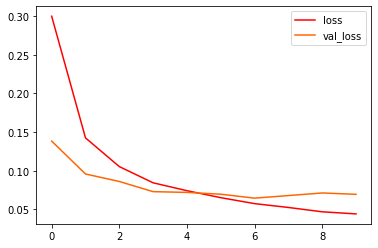

In [7]:
plt.plot(r.history['loss'],label='loss',c='#ff0000')
plt.plot(r.history['val_loss'], label='val_loss',c='#ff6600')
plt.legend()

# **Plotting accuracy per iteration**

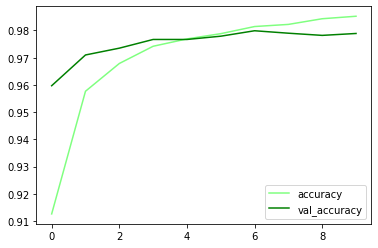

In [8]:
plt.plot(r.history['accuracy'],label='accuracy',c='#80ff80')
plt.plot(r.history['val_accuracy'], label='val_accuracy',c='#008000')
plt.legend()

In [9]:
# Evaluating our model

print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 923us/step - loss: 0.0695 - accuracy: 0.9789
[0.06951717287302017, 0.9789000153541565]


## **Plotting a Confusion Matrix for the classification** 

313/313 [==============================] - 0s 766us/step
Confusion Matrix, without normalization
[[ 971    1    1    0    0    2    3    1    1    0]
 [   0 1128    3    0    0    0    2    0    2    0]
 [   1    2 1005   10    3    0    3    5    3    0]
 [   1    0    1  990    0    7    0    5    1    5]
 [   1    0    1    0  964    0    3    2    2    9]
 [   2    0    0    6    1  871    6    1    3    2]
 [   3    2    1    1    6    4  939    0    2    0]
 [   2    4   12    0    0    0    0 1004    2    4]
 [   4    0    2    5    6    5    3    4  943    2]
 [   2    2    0    7    5    4    0    8    7  974]]


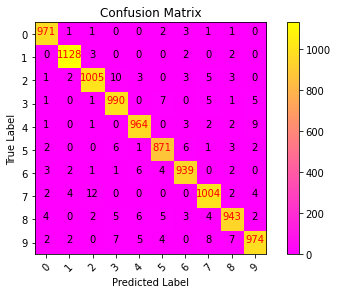

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize='False', title='Confusion Matrix', cmap='spring'):

  # This function returns a confusion matrix. Normalization can be applied by setting normalize=True

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis] #astype() is used to convert a pandas object to a particular datatype
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix, without normalization')
  
  print(cm)

  #used when display resolution and image resolution are not same(Displays the exact image)
  plt.imshow(cm, interpolation='nearest', cmap=cmap) 

  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes)) # No. of tick marks generated as per the no of classes
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.0
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format( cm[i, j], fmt), horizontalalignment = 'center', color = 'red' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)), False) # Sending the confusion matrix and 10 class indexes to the plot function

## **Showing misclassified examples**

Text(0.5, 1.0, 'True Label:7   Predicted Label:1')

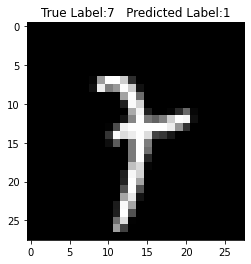

In [12]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title(f'True Label:{y_test[i]}   Predicted Label:{p_test[i]}')